In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import normalize,scale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import keras
import os
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [3]:
df1=df1.reset_index(drop=True)
df1

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [4]:
df2

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [5]:
test_path = r"D:\kodlar\Lecture proggraming\ödevler\KAGGLE PROJELERİ\Plant Pathology 2020 - FGVC7\images"
train_path=r"D:\kodlar\Lecture proggraming\ödevler\KAGGLE PROJELERİ\Plant Pathology 2020 - FGVC7\train"

In [6]:
test_images = os.listdir(test_path)
train_images=  os.listdir(train_path)

In [7]:

for i, name in enumerate(train_images):
    if name[-3:] != "jpg":
        print(f'{i} : {name}')
        print('Removed : ', train_images.pop(i))
        break
        
for i, name in enumerate(test_images):
    if name[-3:] != "jpg":
        print(f'{i} : {name}')
        print('Removed : ', test_images.pop(i))
        break  
        
        
        

test images


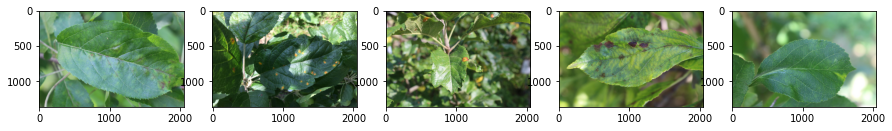

In [8]:
import random

view_infected = random.sample(test_images, 5)

print("test images")
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for i in range(5):
    path = test_path + '/' + view_infected[i]
    image = Image.open(path)
    ax[i].imshow(image)

plt.show()

train images


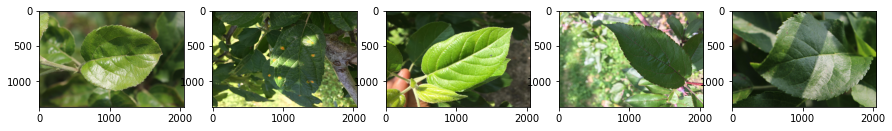

In [9]:
view_uninfected = random.sample(train_images, 5)

print("train images")
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for i in range(5):
    path = train_path + '/' + view_uninfected[i]
    image = Image.open(path)
    ax[i].imshow(image)

plt.show()

In [10]:
df1[df1['healthy']==1]

,image_id,healthy,multiple_diseases,rust,scab
2,Train_2,1,0,0,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0
9,Train_9,1,0,0,0
13,Train_13,1,0,0,0
...,...,...,...,...,...
1808,Train_1808,1,0,0,0
1810,Train_1810,1,0,0,0
1814,Train_1814,1,0,0,0
1817,Train_1817,1,0,0,0


In [11]:
h=list()
m=list()
r=list()
s=list()

b=df1.image_id[df1['healthy']==1]


c=df1.image_id[df1['multiple_diseases']==1]


d=df1.image_id[df1['rust']==1]


e=df1.image_id[df1['scab']==1]

       

In [12]:
test=[]

for i in df2.image_id:
    print(i)
    test.append(i)


Test_0
Test_1
Test_2
Test_3
Test_4
Test_5
Test_6
Test_7
Test_8
Test_9
Test_10
Test_11
Test_12
Test_13
Test_14
Test_15
Test_16
Test_17
Test_18
Test_19
Test_20
Test_21
Test_22
Test_23
Test_24
Test_25
Test_26
Test_27
Test_28
Test_29
Test_30
Test_31
Test_32
Test_33
Test_34
Test_35
Test_36
Test_37
Test_38
Test_39
Test_40
Test_41
Test_42
Test_43
Test_44
Test_45
Test_46
Test_47
Test_48
Test_49
Test_50
Test_51
Test_52
Test_53
Test_54
Test_55
Test_56
Test_57
Test_58
Test_59
Test_60
Test_61
Test_62
Test_63
Test_64
Test_65
Test_66
Test_67
Test_68
Test_69
Test_70
Test_71
Test_72
Test_73
Test_74
Test_75
Test_76
Test_77
Test_78
Test_79
Test_80
Test_81
Test_82
Test_83
Test_84
Test_85
Test_86
Test_87
Test_88
Test_89
Test_90
Test_91
Test_92
Test_93
Test_94
Test_95
Test_96
Test_97
Test_98
Test_99
Test_100
Test_101
Test_102
Test_103
Test_104
Test_105
Test_106
Test_107
Test_108
Test_109
Test_110
Test_111
Test_112
Test_113
Test_114
Test_115
Test_116
Test_117
Test_118
Test_119
Test_120
Test_121
Test_122
Tes

In [13]:

for i in b:
    print(i)
    h.append(i)
for i in c:
    print(i)
    m.append(i)
for i in d:
    print(i)
    r.append(i)
for i in e:
    print(i)
    s.append(i)

Train_2
Train_4
Train_5
Train_9
Train_13
Train_18
Train_24
Train_33
Train_43
Train_46
Train_53
Train_54
Train_55
Train_63
Train_66
Train_67
Train_68
Train_70
Train_72
Train_77
Train_86
Train_88
Train_90
Train_94
Train_99
Train_100
Train_103
Train_105
Train_111
Train_123
Train_134
Train_135
Train_136
Train_137
Train_144
Train_146
Train_151
Train_162
Train_167
Train_174
Train_175
Train_179
Train_195
Train_198
Train_199
Train_201
Train_213
Train_215
Train_219
Train_220
Train_221
Train_224
Train_227
Train_238
Train_246
Train_247
Train_248
Train_249
Train_257
Train_261
Train_263
Train_264
Train_265
Train_266
Train_271
Train_273
Train_278
Train_282
Train_287
Train_291
Train_295
Train_298
Train_300
Train_304
Train_307
Train_311
Train_317
Train_320
Train_329
Train_330
Train_335
Train_337
Train_339
Train_348
Train_356
Train_357
Train_359
Train_360
Train_365
Train_366
Train_367
Train_373
Train_375
Train_376
Train_378
Train_380
Train_383
Train_389
Train_392
Train_393
Train_396
Train_397
Train_404

In [14]:
h

['Train_2',
 'Train_4',
 'Train_5',
 'Train_9',
 'Train_13',
 'Train_18',
 'Train_24',
 'Train_33',
 'Train_43',
 'Train_46',
 'Train_53',
 'Train_54',
 'Train_55',
 'Train_63',
 'Train_66',
 'Train_67',
 'Train_68',
 'Train_70',
 'Train_72',
 'Train_77',
 'Train_86',
 'Train_88',
 'Train_90',
 'Train_94',
 'Train_99',
 'Train_100',
 'Train_103',
 'Train_105',
 'Train_111',
 'Train_123',
 'Train_134',
 'Train_135',
 'Train_136',
 'Train_137',
 'Train_144',
 'Train_146',
 'Train_151',
 'Train_162',
 'Train_167',
 'Train_174',
 'Train_175',
 'Train_179',
 'Train_195',
 'Train_198',
 'Train_199',
 'Train_201',
 'Train_213',
 'Train_215',
 'Train_219',
 'Train_220',
 'Train_221',
 'Train_224',
 'Train_227',
 'Train_238',
 'Train_246',
 'Train_247',
 'Train_248',
 'Train_249',
 'Train_257',
 'Train_261',
 'Train_263',
 'Train_264',
 'Train_265',
 'Train_266',
 'Train_271',
 'Train_273',
 'Train_278',
 'Train_282',
 'Train_287',
 'Train_291',
 'Train_295',
 'Train_298',
 'Train_300',
 'Train

In [15]:
cells = list()
label = list()

IMG_SIZE = (64, 64)

try:
    cells = np.load('cells.npy')
    label = np.load('label.npy')
except FileNotFoundError:
    print("Processed files not found. \nProcessing...")

    for name in h:
        path = train_path + '/' + name + ('.jpg')
        image = Image.open(path)
        image_data = np.array(image.resize(IMG_SIZE))
        cells.append(image_data)
        label.append(0)
        
    
    for name in r:
        path = train_path + '/' + name + ('.jpg')
        image = Image.open(path)
        image_data = np.array(image.resize(IMG_SIZE))
        cells.append(image_data)
        label.append(1)
        
    for name in s:
        path = train_path + '/' + name + ('.jpg')
        image = Image.open(path)
        image_data = np.array(image.resize(IMG_SIZE))
        cells.append(image_data)
        label.append(2) 


    for name in m:
        path = train_path + '/' + name + ('.jpg')
        image = Image.open(path)
        image_data = np.array(image.resize((64,64)))
        cells.append(image_data)
        label.append(3)


    cells = (np.array(cells).astype(float))/255
    label = np.array(label)
    
    np.save('cells.npy', cells)
    np.save('label.npy', label)

print(f'Cells Shape: {cells.shape} | Cells Dtype : {cells.dtype}')
print(f'Labels Shape: {label.shape} | Labels Dtype : {label.dtype}')

Cells Shape: (1821, 64, 64, 3) | Cells Dtype : float64
Labels Shape: (1821,) | Labels Dtype : int32


In [19]:
model=keras.Sequential([keras.layers.InputLayer(input_shape=(64,64,3)),
                        keras.layers.Reshape(target_shape=(64,64,3)),
                        keras.layers.Conv2D(filters=12,kernel_size=(3,3),activation=tf.nn.relu),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(4)
                        ]) # CNN-Convolutional Neural Network

In [20]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [21]:
model.fit(cells,label,validation_split=0.1,epochs=50)

Epoch 1/50
52/52 [==============================] - 1s 16ms/step - loss: 1.0878 - accuracy: 0.4127 - val_loss: 4.9143 - val_accuracy: 0.0000e+00
Epoch 2/50
52/52 [==============================] - 1s 14ms/step - loss: 0.9923 - accuracy: 0.5110 - val_loss: 4.7354 - val_accuracy: 0.1694
Epoch 3/50
52/52 [==============================] - 1s 15ms/step - loss: 0.9227 - accuracy: 0.5794 - val_loss: 4.3117 - val_accuracy: 0.2623
Epoch 4/50
52/52 [==============================] - 1s 14ms/step - loss: 0.8637 - accuracy: 0.6294 - val_loss: 5.6929 - val_accuracy: 0.1038
Epoch 5/50
52/52 [==============================] - 1s 14ms/step - loss: 0.8047 - accuracy: 0.6679 - val_loss: 5.5920 - val_accuracy: 0.1366
Epoch 6/50
52/52 [==============================] - 1s 14ms/step - loss: 0.7355 - accuracy: 0.7204 - val_loss: 9.3801 - val_accuracy: 0.3115
Epoch 7/50
52/52 [==============================] - 1s 14ms/step - loss: 0.6946 - accuracy: 0.7247 - val_loss: 8.0934 - val_accuracy: 0.0929
Epoch 8/5

In [22]:
cells_test=list()

for name in test:
    path = test_path + '/' + name + ('.jpg')
    image = Image.open(path)
    image_data = np.array(image.resize(IMG_SIZE))
    cells_test.append(image_data)
        
cells_test = (np.array(cells_test).astype(float))/255

In [23]:
tahmin=model.predict(cells_test)

57/57 [==============================] - 0s 5ms/step


In [24]:
tahmin.shape

(1821, 4)

In [25]:
df2[['healthy','rust','scab','multiple_diseases']]=tahmin

In [26]:
df2

,image_id,healthy,rust,scab,multiple_diseases
0,Test_0,-5.033249,0.863385,-2.773147,-49.762779
1,Test_1,-5.146377,1.100356,-2.802418,-50.796993
2,Test_2,1.697646,-8.017787,-0.429662,-54.004314
3,Test_3,0.279663,-0.665430,-1.341225,-33.134609
4,Test_4,-5.805125,-0.847066,-0.048077,-51.399948
...,...,...,...,...,...
1816,Test_1816,-1.921593,-1.848149,-0.399697,-39.677834
1817,Test_1817,-5.051665,-4.803744,2.310306,-45.005722
1818,Test_1818,-1.117665,-3.686729,0.402753,-41.084469
1819,Test_1819,-1.542692,-2.692431,-2.572151,-46.419281


In [27]:
df2.to_csv('plant.csv',index=False)